In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import numpy as np 
import scipy as sp 
import sklearn
import random 
from sklearn.preprocessing import MinMaxScaler
import time 
from sklearn import preprocessing, model_selection
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.layers import Embedding, LSTM, SpatialDropout1D
data = pd.read_csv('poiversion.csv')
#data = shuffle(data)

C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [2]:
#data = data.drop(['name', 'version', 'name'], axis =1)
X = data.drop(['bug'], axis = 1)
X = np.array(X)
Y = data['bug']
Y.shape

(1378,)

In [3]:
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])
print(data.head())

        wmc  dit  noc       cbo       rfc      lcom        ca        ce  \
0  0.186567  0.2  0.0  0.028037  0.112821  0.018133  0.004717  0.037594   
1  0.149254  0.2  0.0  0.018692  0.092308  0.019550  0.004717  0.030075   
2  0.171642  0.2  0.0  0.037383  0.123077  0.033291  0.009434  0.045113   
3  0.164179  0.2  0.0  0.023364  0.105128  0.022524  0.009434  0.022556   
4  0.029851  0.6  0.0  0.014019  0.020513  0.000850  0.009434  0.007519   

        npm     lcom3  ...       dam       moa       mfa       cam        ic  \
0  0.227723  0.474432  ...  0.363636  0.088235  0.333333  0.352000  0.333333   
1  0.198020  0.423445  ...  0.909091  0.205882  0.280000  0.225000  0.333333   
2  0.207921  0.462121  ...  0.444444  0.000000  0.354839  0.289855  0.333333   
3  0.178218  0.351190  ...  0.750000  0.000000  0.366667  0.266234  0.666667   
4  0.039604  1.000000  ...  0.000000  0.000000  1.000000  0.666667  0.000000   

    cbm       amc    max_cc    avg_cc  bug  
0  0.30  0.024790  0.01

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 771 samples, validate on 331 samples
Epoch 1/500
771/771 [==============================] - 5s 6ms/step - loss: 2.9350 - acc: 0.4306 - mean_squared_error: 2.6700 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.9287 - cosine_proximity: -2.2647 - val_loss: 2.6300 - val_acc: 0.4471 - val_mean_squared_error: 5.5986 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.3293 - val_cosine_proximity: -2.4604
Epoch 2/500
771/771 [==============================] - 0s 319us/step - loss: 1.9485 - acc: 0.5045 - mean_squared_error: 2.6754 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.0506 - cosine_proximity: -1.5372 - val_loss: 1.5437 - val_acc: 0.4471 - val_mean_squared_error: 5.61

771/771 [==============================] - 0s 415us/step - loss: 1.2028 - acc: 0.5136 - mean_squared_error: 2.6860 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.8534 - cosine_proximity: -0.8880 - val_loss: 1.3685 - val_acc: 0.4653 - val_mean_squared_error: 5.6155 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.0030 - val_cosine_proximity: -0.9439
Epoch 19/500
771/771 [==============================] - 0s 503us/step - loss: 1.2129 - acc: 0.5175 - mean_squared_error: 2.6870 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.8729 - cosine_proximity: -0.8544 - val_loss: 1.3927 - val_acc: 0.4411 - val_mean_squared_error: 5.6174 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.6193 - val_cosine_proximity: -0.9096
Epoch 20/500
771/771 [==============================] - 0s 433us/step - loss: 1.2147 - acc: 0.5214 - mean_squared_error: 2.6869 - mean_absolute_error: 0.9019 - mean_abso

771/771 [==============================] - 0s 325us/step - loss: 1.1876 - acc: 0.5149 - mean_squared_error: 2.6878 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.8457 - cosine_proximity: -0.8654 - val_loss: 1.3600 - val_acc: 0.4713 - val_mean_squared_error: 5.6143 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.6193 - val_cosine_proximity: -0.9791
Epoch 38/500
771/771 [==============================] - 0s 321us/step - loss: 1.1856 - acc: 0.5058 - mean_squared_error: 2.6882 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.3280 - cosine_proximity: -0.8551 - val_loss: 1.3656 - val_acc: 0.4743 - val_mean_squared_error: 5.6148 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.5166 - val_cosine_proximity: -0.9515
Epoch 39/500
771/771 [==============================] - 0s 300us/step - loss: 1.2160 - acc: 0.4903 - mean_squared_error: 2.6859 - mean_absolute_error: 0.9019 - mean_abso

771/771 [==============================] - 0s 332us/step - loss: 1.1609 - acc: 0.5110 - mean_squared_error: 2.6873 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7393 - cosine_proximity: -0.8902 - val_loss: 1.3797 - val_acc: 0.4441 - val_mean_squared_error: 5.6162 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.2326 - val_cosine_proximity: -0.9443
Epoch 57/500
771/771 [==============================] - 0s 329us/step - loss: 1.1710 - acc: 0.5032 - mean_squared_error: 2.6880 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.6744 - cosine_proximity: -0.8649 - val_loss: 1.3841 - val_acc: 0.4713 - val_mean_squared_error: 5.6155 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.8066 - val_cosine_proximity: -0.9484
Epoch 58/500
771/771 [==============================] - 0s 330us/step - loss: 1.1791 - acc: 0.5019 - mean_squared_error: 2.6878 - mean_absolute_error: 0.9019 - mean_abso

771/771 [==============================] - 0s 426us/step - loss: 1.1622 - acc: 0.4994 - mean_squared_error: 2.6875 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.9598 - cosine_proximity: -0.8859 - val_loss: 1.3821 - val_acc: 0.4743 - val_mean_squared_error: 5.6147 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291954.0060 - val_cosine_proximity: -0.9604
Epoch 76/500
771/771 [==============================] - 0s 409us/step - loss: 1.1813 - acc: 0.4864 - mean_squared_error: 2.6869 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.1894 - cosine_proximity: -0.8702 - val_loss: 1.3697 - val_acc: 0.4592 - val_mean_squared_error: 5.6143 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.0997 - val_cosine_proximity: -0.9761
Epoch 77/500
771/771 [==============================] - 0s 445us/step - loss: 1.1777 - acc: 0.5071 - mean_squared_error: 2.6862 - mean_absolute_error: 0.9019 - mean_abso

771/771 [==============================] - 0s 346us/step - loss: 1.1526 - acc: 0.5188 - mean_squared_error: 2.6868 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.2646 - cosine_proximity: -0.8811 - val_loss: 1.3687 - val_acc: 0.4441 - val_mean_squared_error: 5.6163 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.0393 - val_cosine_proximity: -0.9392
Epoch 95/500
771/771 [==============================] - 0s 327us/step - loss: 1.1694 - acc: 0.5045 - mean_squared_error: 2.6879 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.8379 - cosine_proximity: -0.8699 - val_loss: 1.3517 - val_acc: 0.4502 - val_mean_squared_error: 5.6155 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.3897 - val_cosine_proximity: -0.9540
Epoch 96/500
771/771 [==============================] - 0s 305us/step - loss: 1.1463 - acc: 0.5110 - mean_squared_error: 2.6880 - mean_absolute_error: 0.9019 - mean_abso

771/771 [==============================] - 0s 331us/step - loss: 1.1514 - acc: 0.5214 - mean_squared_error: 2.6871 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.5345 - cosine_proximity: -0.8811 - val_loss: 1.4087 - val_acc: 0.4381 - val_mean_squared_error: 5.6175 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.2931 - val_cosine_proximity: -0.9145
Epoch 114/500
771/771 [==============================] - 0s 316us/step - loss: 1.1558 - acc: 0.5019 - mean_squared_error: 2.6878 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7821 - cosine_proximity: -0.8724 - val_loss: 1.3819 - val_acc: 0.4653 - val_mean_squared_error: 5.6154 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.7160 - val_cosine_proximity: -0.9546
Epoch 115/500
771/771 [==============================] - 0s 329us/step - loss: 1.1437 - acc: 0.5344 - mean_squared_error: 2.6878 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 326us/step - loss: 1.1433 - acc: 0.5227 - mean_squared_error: 2.6878 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.1971 - cosine_proximity: -0.8835 - val_loss: 1.3965 - val_acc: 0.4683 - val_mean_squared_error: 5.6163 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291954.1994 - val_cosine_proximity: -0.9427
Epoch 133/500
771/771 [==============================] - 0s 398us/step - loss: 1.1389 - acc: 0.5279 - mean_squared_error: 2.6880 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.0376 - cosine_proximity: -0.8650 - val_loss: 1.3948 - val_acc: 0.4411 - val_mean_squared_error: 5.6169 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291952.7492 - val_cosine_proximity: -0.9347
Epoch 134/500
771/771 [==============================] - 0s 433us/step - loss: 1.1190 - acc: 0.5447 - mean_squared_error: 2.6887 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 365us/step - loss: 1.1399 - acc: 0.5279 - mean_squared_error: 2.6881 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7451 - cosine_proximity: -0.8681 - val_loss: 1.3891 - val_acc: 0.4773 - val_mean_squared_error: 5.6160 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.3897 - val_cosine_proximity: -0.9694
Epoch 152/500
771/771 [==============================] - 0s 340us/step - loss: 1.1373 - acc: 0.5136 - mean_squared_error: 2.6876 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.9455 - cosine_proximity: -0.8895 - val_loss: 1.4014 - val_acc: 0.4864 - val_mean_squared_error: 5.6173 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.8127 - val_cosine_proximity: -0.9314
Epoch 153/500
771/771 [==============================] - 0s 311us/step - loss: 1.1296 - acc: 0.5279 - mean_squared_error: 2.6885 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 352us/step - loss: 1.1276 - acc: 0.5058 - mean_squared_error: 2.6879 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7056 - cosine_proximity: -0.8990 - val_loss: 1.3912 - val_acc: 0.4804 - val_mean_squared_error: 5.6160 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291954.0665 - val_cosine_proximity: -0.9595
Epoch 171/500
771/771 [==============================] - 0s 320us/step - loss: 1.1257 - acc: 0.5305 - mean_squared_error: 2.6888 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.1556 - cosine_proximity: -0.8519 - val_loss: 1.3868 - val_acc: 0.4894 - val_mean_squared_error: 5.6161 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.5831 - val_cosine_proximity: -0.9608
Epoch 172/500
771/771 [==============================] - 0s 332us/step - loss: 1.1256 - acc: 0.5422 - mean_squared_error: 2.6876 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 356us/step - loss: 1.1160 - acc: 0.5473 - mean_squared_error: 2.6873 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.5136 - cosine_proximity: -0.8897 - val_loss: 1.4065 - val_acc: 0.5015 - val_mean_squared_error: 5.6175 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291952.9426 - val_cosine_proximity: -0.9310
Epoch 190/500
771/771 [==============================] - 0s 348us/step - loss: 1.1191 - acc: 0.5370 - mean_squared_error: 2.6887 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.9520 - cosine_proximity: -0.8753 - val_loss: 1.3903 - val_acc: 0.4592 - val_mean_squared_error: 5.6151 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.6193 - val_cosine_proximity: -0.9764
Epoch 191/500
771/771 [==============================] - 0s 434us/step - loss: 1.1047 - acc: 0.5331 - mean_squared_error: 2.6886 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 344us/step - loss: 1.1244 - acc: 0.5110 - mean_squared_error: 2.6885 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.5979 - cosine_proximity: -0.8691 - val_loss: 1.3840 - val_acc: 0.5166 - val_mean_squared_error: 5.6161 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.2326 - val_cosine_proximity: -0.9475
Epoch 209/500
771/771 [==============================] - 0s 359us/step - loss: 1.1276 - acc: 0.5396 - mean_squared_error: 2.6878 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.8275 - cosine_proximity: -0.8706 - val_loss: 1.4133 - val_acc: 0.4622 - val_mean_squared_error: 5.6170 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.7160 - val_cosine_proximity: -0.9359
Epoch 210/500
771/771 [==============================] - 0s 339us/step - loss: 1.1065 - acc: 0.5422 - mean_squared_error: 2.6883 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 342us/step - loss: 1.1126 - acc: 0.5538 - mean_squared_error: 2.6876 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.8716 - cosine_proximity: -0.9090 - val_loss: 1.4194 - val_acc: 0.4985 - val_mean_squared_error: 5.6179 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.3897 - val_cosine_proximity: -0.9277
Epoch 228/500
771/771 [==============================] - 0s 324us/step - loss: 1.1075 - acc: 0.5525 - mean_squared_error: 2.6892 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.1025 - cosine_proximity: -0.8591 - val_loss: 1.3979 - val_acc: 0.4924 - val_mean_squared_error: 5.6164 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.7160 - val_cosine_proximity: -0.9412
Epoch 229/500
771/771 [==============================] - 0s 325us/step - loss: 1.0687 - acc: 0.5512 - mean_squared_error: 2.6884 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 336us/step - loss: 1.1129 - acc: 0.5357 - mean_squared_error: 2.6879 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.9546 - cosine_proximity: -0.8756 - val_loss: 1.4334 - val_acc: 0.5015 - val_mean_squared_error: 5.6176 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.1299 - val_cosine_proximity: -0.9358
Epoch 247/500
771/771 [==============================] - 0s 410us/step - loss: 1.1070 - acc: 0.5422 - mean_squared_error: 2.6890 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.8470 - cosine_proximity: -0.8643 - val_loss: 1.4202 - val_acc: 0.4834 - val_mean_squared_error: 5.6169 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.6193 - val_cosine_proximity: -0.9417
Epoch 248/500
771/771 [==============================] - 0s 453us/step - loss: 1.0760 - acc: 0.5460 - mean_squared_error: 2.6885 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 354us/step - loss: 1.0851 - acc: 0.5447 - mean_squared_error: 2.6892 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.2370 - cosine_proximity: -0.8598 - val_loss: 1.4064 - val_acc: 0.4924 - val_mean_squared_error: 5.6158 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.2326 - val_cosine_proximity: -0.9600
Epoch 266/500
771/771 [==============================] - 0s 323us/step - loss: 1.0863 - acc: 0.5396 - mean_squared_error: 2.6887 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7393 - cosine_proximity: -0.8750 - val_loss: 1.4213 - val_acc: 0.5045 - val_mean_squared_error: 5.6171 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.2326 - val_cosine_proximity: -0.9438
Epoch 267/500
771/771 [==============================] - 0s 329us/step - loss: 1.1012 - acc: 0.5318 - mean_squared_error: 2.6888 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 351us/step - loss: 1.0710 - acc: 0.5383 - mean_squared_error: 2.6892 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.1673 - cosine_proximity: -0.8615 - val_loss: 1.4451 - val_acc: 0.5015 - val_mean_squared_error: 5.6180 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.6193 - val_cosine_proximity: -0.9272
Epoch 285/500
771/771 [==============================] - 0s 324us/step - loss: 1.0892 - acc: 0.5499 - mean_squared_error: 2.6886 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.0882 - cosine_proximity: -0.8811 - val_loss: 1.4379 - val_acc: 0.5045 - val_mean_squared_error: 5.6176 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.8127 - val_cosine_proximity: -0.9380
Epoch 286/500
771/771 [==============================] - 0s 318us/step - loss: 1.0876 - acc: 0.5551 - mean_squared_error: 2.6887 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 344us/step - loss: 1.1037 - acc: 0.5473 - mean_squared_error: 2.6880 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7389 - cosine_proximity: -0.8985 - val_loss: 1.4206 - val_acc: 0.5045 - val_mean_squared_error: 5.6170 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.2931 - val_cosine_proximity: -0.9400
Epoch 304/500
771/771 [==============================] - 0s 359us/step - loss: 1.0817 - acc: 0.5435 - mean_squared_error: 2.6885 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.9183 - cosine_proximity: -0.8661 - val_loss: 1.4475 - val_acc: 0.4924 - val_mean_squared_error: 5.6184 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.5287 - val_cosine_proximity: -0.9207
Epoch 305/500
771/771 [==============================] - 0s 412us/step - loss: 1.0856 - acc: 0.5486 - mean_squared_error: 2.6892 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 332us/step - loss: 1.0809 - acc: 0.5447 - mean_squared_error: 2.6893 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.0130 - cosine_proximity: -0.8565 - val_loss: 1.4383 - val_acc: 0.5317 - val_mean_squared_error: 5.6181 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291952.9063 - val_cosine_proximity: -0.9253
Epoch 323/500
771/771 [==============================] - 0s 337us/step - loss: 1.0628 - acc: 0.5396 - mean_squared_error: 2.6892 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.9287 - cosine_proximity: -0.8653 - val_loss: 1.4359 - val_acc: 0.5015 - val_mean_squared_error: 5.6169 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.6798 - val_cosine_proximity: -0.9560
Epoch 324/500
771/771 [==============================] - 0s 336us/step - loss: 1.0797 - acc: 0.5486 - mean_squared_error: 2.6890 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 337us/step - loss: 1.0807 - acc: 0.5512 - mean_squared_error: 2.6896 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.2789 - cosine_proximity: -0.8629 - val_loss: 1.4604 - val_acc: 0.5076 - val_mean_squared_error: 5.6177 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.2266 - val_cosine_proximity: -0.9237
Epoch 342/500
771/771 [==============================] - 0s 322us/step - loss: 1.0507 - acc: 0.5642 - mean_squared_error: 2.6894 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.5966 - cosine_proximity: -0.8580 - val_loss: 1.4649 - val_acc: 0.5166 - val_mean_squared_error: 5.6184 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.0997 - val_cosine_proximity: -0.9055
Epoch 343/500
771/771 [==============================] - 0s 325us/step - loss: 1.0644 - acc: 0.5305 - mean_squared_error: 2.6890 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 342us/step - loss: 1.0543 - acc: 0.5577 - mean_squared_error: 2.6895 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.8353 - cosine_proximity: -0.8557 - val_loss: 1.4968 - val_acc: 0.5136 - val_mean_squared_error: 5.6188 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291954.3565 - val_cosine_proximity: -0.9156
Epoch 361/500
771/771 [==============================] - 0s 398us/step - loss: 1.0418 - acc: 0.5694 - mean_squared_error: 2.6902 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.9222 - cosine_proximity: -0.8597 - val_loss: 1.4609 - val_acc: 0.5015 - val_mean_squared_error: 5.6177 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291952.9366 - val_cosine_proximity: -0.9243
Epoch 362/500
771/771 [==============================] - 0s 431us/step - loss: 1.0402 - acc: 0.5538 - mean_squared_error: 2.6890 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 368us/step - loss: 1.0464 - acc: 0.5642 - mean_squared_error: 2.6899 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.5760 - cosine_proximity: -0.8587 - val_loss: 1.4952 - val_acc: 0.5076 - val_mean_squared_error: 5.6185 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.3293 - val_cosine_proximity: -0.9145
Epoch 380/500
771/771 [==============================] - 0s 336us/step - loss: 1.0354 - acc: 0.5603 - mean_squared_error: 2.6890 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7866 - cosine_proximity: -0.8744 - val_loss: 1.4949 - val_acc: 0.4985 - val_mean_squared_error: 5.6183 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.0997 - val_cosine_proximity: -0.9194
Epoch 381/500
771/771 [==============================] - 0s 342us/step - loss: 1.0581 - acc: 0.5525 - mean_squared_error: 2.6894 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 367us/step - loss: 1.0442 - acc: 0.5590 - mean_squared_error: 2.6902 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7523 - cosine_proximity: -0.8421 - val_loss: 1.4747 - val_acc: 0.5196 - val_mean_squared_error: 5.6181 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.5227 - val_cosine_proximity: -0.9307
Epoch 399/500
771/771 [==============================] - 0s 332us/step - loss: 1.0586 - acc: 0.5694 - mean_squared_error: 2.6890 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.9364 - cosine_proximity: -0.8704 - val_loss: 1.4830 - val_acc: 0.5196 - val_mean_squared_error: 5.6181 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.4260 - val_cosine_proximity: -0.9230
Epoch 400/500
771/771 [==============================] - 0s 337us/step - loss: 1.0289 - acc: 0.5772 - mean_squared_error: 2.6898 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 408us/step - loss: 1.0522 - acc: 0.5499 - mean_squared_error: 2.6896 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.8820 - cosine_proximity: -0.8714 - val_loss: 1.4776 - val_acc: 0.4834 - val_mean_squared_error: 5.6179 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.3897 - val_cosine_proximity: -0.9185
Epoch 418/500
771/771 [==============================] - 0s 440us/step - loss: 1.0294 - acc: 0.5486 - mean_squared_error: 2.6899 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.6693 - cosine_proximity: -0.8474 - val_loss: 1.4936 - val_acc: 0.4894 - val_mean_squared_error: 5.6189 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.5227 - val_cosine_proximity: -0.9058
Epoch 419/500
771/771 [==============================] - 0s 466us/step - loss: 1.0356 - acc: 0.5577 - mean_squared_error: 2.6897 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 377us/step - loss: 1.0432 - acc: 0.5473 - mean_squared_error: 2.6896 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7393 - cosine_proximity: -0.8633 - val_loss: 1.5240 - val_acc: 0.5166 - val_mean_squared_error: 5.6195 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291952.7492 - val_cosine_proximity: -0.9001
Epoch 437/500
771/771 [==============================] - 0s 326us/step - loss: 1.0247 - acc: 0.5642 - mean_squared_error: 2.6903 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.9222 - cosine_proximity: -0.8558 - val_loss: 1.4878 - val_acc: 0.4955 - val_mean_squared_error: 5.6183 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.6193 - val_cosine_proximity: -0.9178
Epoch 438/500
771/771 [==============================] - 0s 335us/step - loss: 1.0319 - acc: 0.5629 - mean_squared_error: 2.6893 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 341us/step - loss: 1.0440 - acc: 0.5512 - mean_squared_error: 2.6900 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.0869 - cosine_proximity: -0.8557 - val_loss: 1.5235 - val_acc: 0.5045 - val_mean_squared_error: 5.6184 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.2931 - val_cosine_proximity: -0.9197
Epoch 456/500
771/771 [==============================] - 0s 316us/step - loss: 1.0341 - acc: 0.5629 - mean_squared_error: 2.6897 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.6874 - cosine_proximity: -0.8578 - val_loss: 1.5367 - val_acc: 0.5106 - val_mean_squared_error: 5.6190 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.7160 - val_cosine_proximity: -0.8949
Epoch 457/500
771/771 [==============================] - 0s 332us/step - loss: 1.0280 - acc: 0.5798 - mean_squared_error: 2.6903 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 445us/step - loss: 1.0483 - acc: 0.5435 - mean_squared_error: 2.6900 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.8872 - cosine_proximity: -0.8546 - val_loss: 1.5010 - val_acc: 0.4804 - val_mean_squared_error: 5.6185 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.3293 - val_cosine_proximity: -0.9171
Epoch 475/500
771/771 [==============================] - 0s 423us/step - loss: 1.0218 - acc: 0.5940 - mean_squared_error: 2.6895 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7990 - cosine_proximity: -0.8700 - val_loss: 1.5136 - val_acc: 0.5045 - val_mean_squared_error: 5.6191 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291954.1027 - val_cosine_proximity: -0.9116
Epoch 476/500
771/771 [==============================] - 0s 459us/step - loss: 1.0280 - acc: 0.5603 - mean_squared_error: 2.6910 - mean_absolute_error: 0.9019 - mean_ab

771/771 [==============================] - 0s 379us/step - loss: 1.0325 - acc: 0.5447 - mean_squared_error: 2.6903 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025741.0039 - cosine_proximity: -0.8410 - val_loss: 1.4848 - val_acc: 0.4804 - val_mean_squared_error: 5.6181 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291954.1027 - val_cosine_proximity: -0.9179
Epoch 494/500
771/771 [==============================] - 0s 351us/step - loss: 1.0363 - acc: 0.5603 - mean_squared_error: 2.6892 - mean_absolute_error: 0.9019 - mean_absolute_percentage_error: 24025740.7562 - cosine_proximity: -0.8635 - val_loss: 1.5080 - val_acc: 0.4864 - val_mean_squared_error: 5.6193 - val_mean_absolute_error: 1.1581 - val_mean_absolute_percentage_error: 21291953.5227 - val_cosine_proximity: -0.8961
Epoch 495/500
771/771 [==============================] - 0s 314us/step - loss: 1.0153 - acc: 0.5668 - mean_squared_error: 2.6909 - mean_absolute_error: 0.9019 - mean_ab

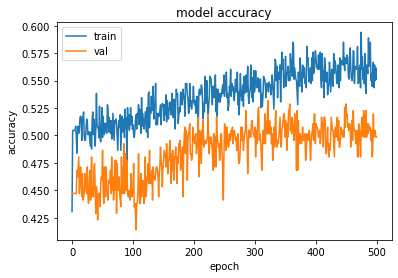

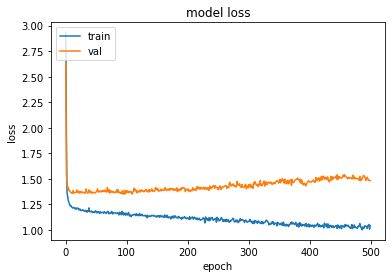

In [4]:
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,Y,test_size = 0.2, random_state = 0)
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
input_dim = len(data.columns) - 1
model = Sequential()
#model.add(Embedding(1024, 1, input_length=20))
model.add(LSTM(100, input_shape = (1,20), dropout = 0.2, return_sequences=True))
model.add(LSTM(80, dropout = 0.2, return_sequences=True))
#model.add(LSTM(512, dropout = 0.3, return_sequences=True))
#model.add(LSTM(256, dropout = 0.4, return_sequences=True))
#model.add(LSTM(90, dropout = 0.2, return_sequences=True))
#model.add(LSTM(80, dropout = 0.2, return_sequences=True))
model.add(LSTM(60, dropout = 0.2, return_sequences=False))
#model.add(LSTM(16, input_shape=(1,20), dropout = 0.67))
#model.add(Dense(1, activation='softmax'))
#model.add(SpatialDropout1D(0.7))
#model.add(LSTM(64, dropout=0.7))
#model.add(LSTM(16, dropout=0.7, return_sequences=True))
#model.add(LSTM(8, dropout=0.7))
#model.add(Dense(10, input_dim = input_dim , activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(6, activation = 'relu'))
#model.add(Dense(32, activation = 'softmax'))
model.add(Dense(21, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy','mse', 'mae', 'mape', 'cosine'] )
history = model.fit(train_x, train_y, validation_split = 0.3, epochs = 500, batch_size = 32)
score = model.evaluate(test_x, test_y)
print(history.history.keys())
model.test_on_batch(test_x, test_y)
model.metrics_names
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], score[2]*100))
print("\n%s: %.2f%%" % (model.metrics_names[3], score[3]*100))
print("\n%s: %.2f%%" % (model.metrics_names[4], score[4]))
print("\n%s: %.2f%%" % (model.metrics_names[5], score[5]*100))
#print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            48400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 80)             57920     
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                33840     
_________________________________________________________________
dense_1 (Dense)              (None, 21)                1281      
Total params: 141,441
Trainable params: 141,441
Non-trainable params: 0
_________________________________________________________________
